# Visualisierung von Regioneneigenschaften in napari
Die Visualisierung quantitativer Messungen von Regionen in Farbe über den Regionen ist eine häufige Aufgabe bei der Verwendung von napari. Das napari-Plugin [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops) bietet einige Annehmlichkeiten beim Zeichnen solcher parametrischen Bilder.

Siehe auch
* [Parametrische Bilder](data_visualization.parametric_maps)

In [1]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops_table
import napari
from napari_skimage_regionprops import visualize_measurement_on_labels, add_table

Wir beginnen damit, ein Bild zu laden und es in napari zu visualisieren.

In [2]:
image = imread('../../data/blobs.tif')

In [3]:
# Erstellen eines leeren Viewers
viewer = napari.Viewer()

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


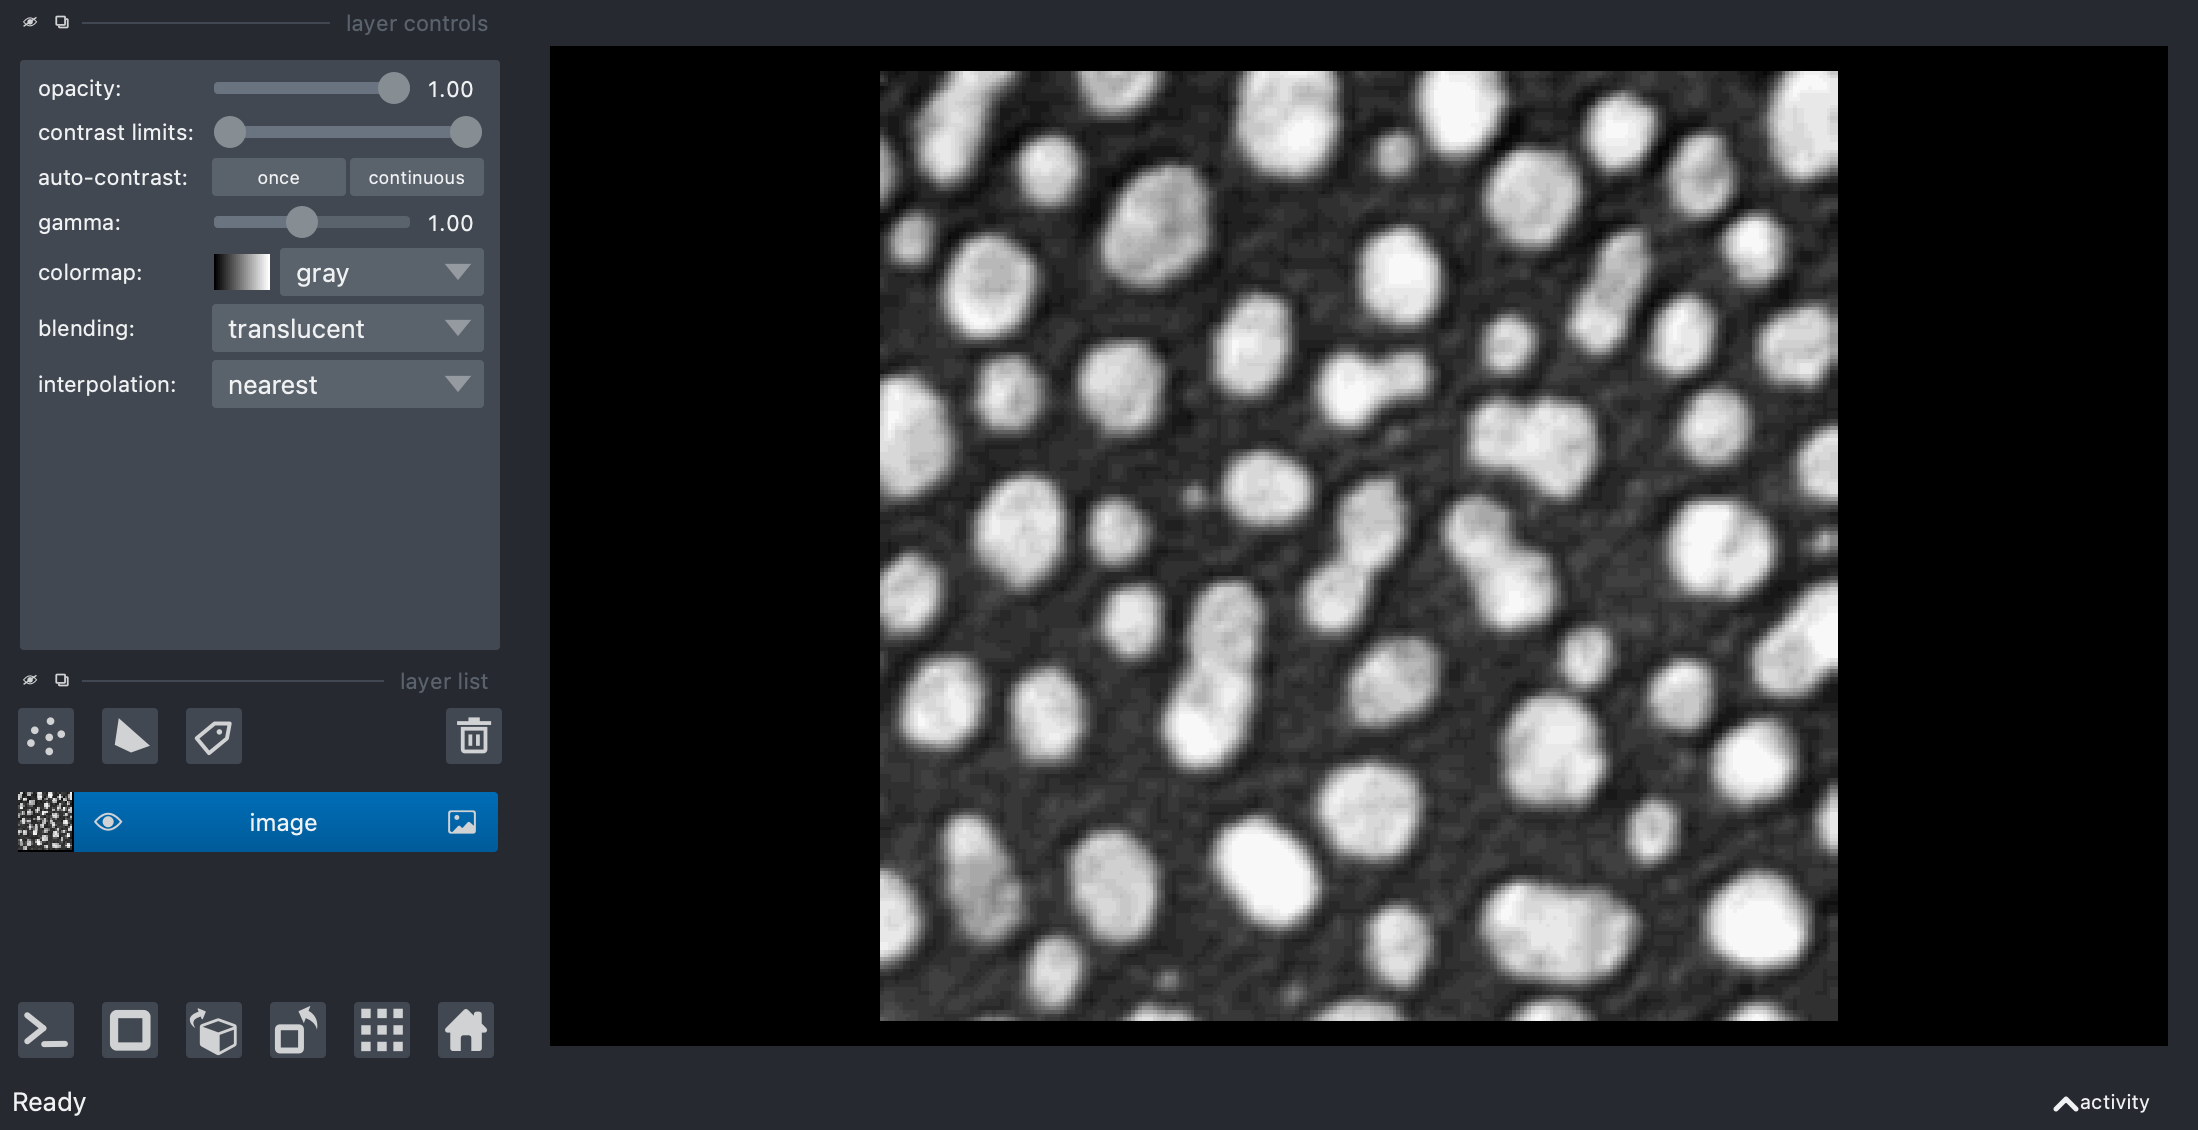

In [4]:
# Hinzufügen einer neuen Ebene mit einem Bild
viewer.add_image(image)

napari.utils.nbscreenshot(viewer)

Als nächstes segmentieren wir Blobs im Bild und erstellen ein Labelbild.

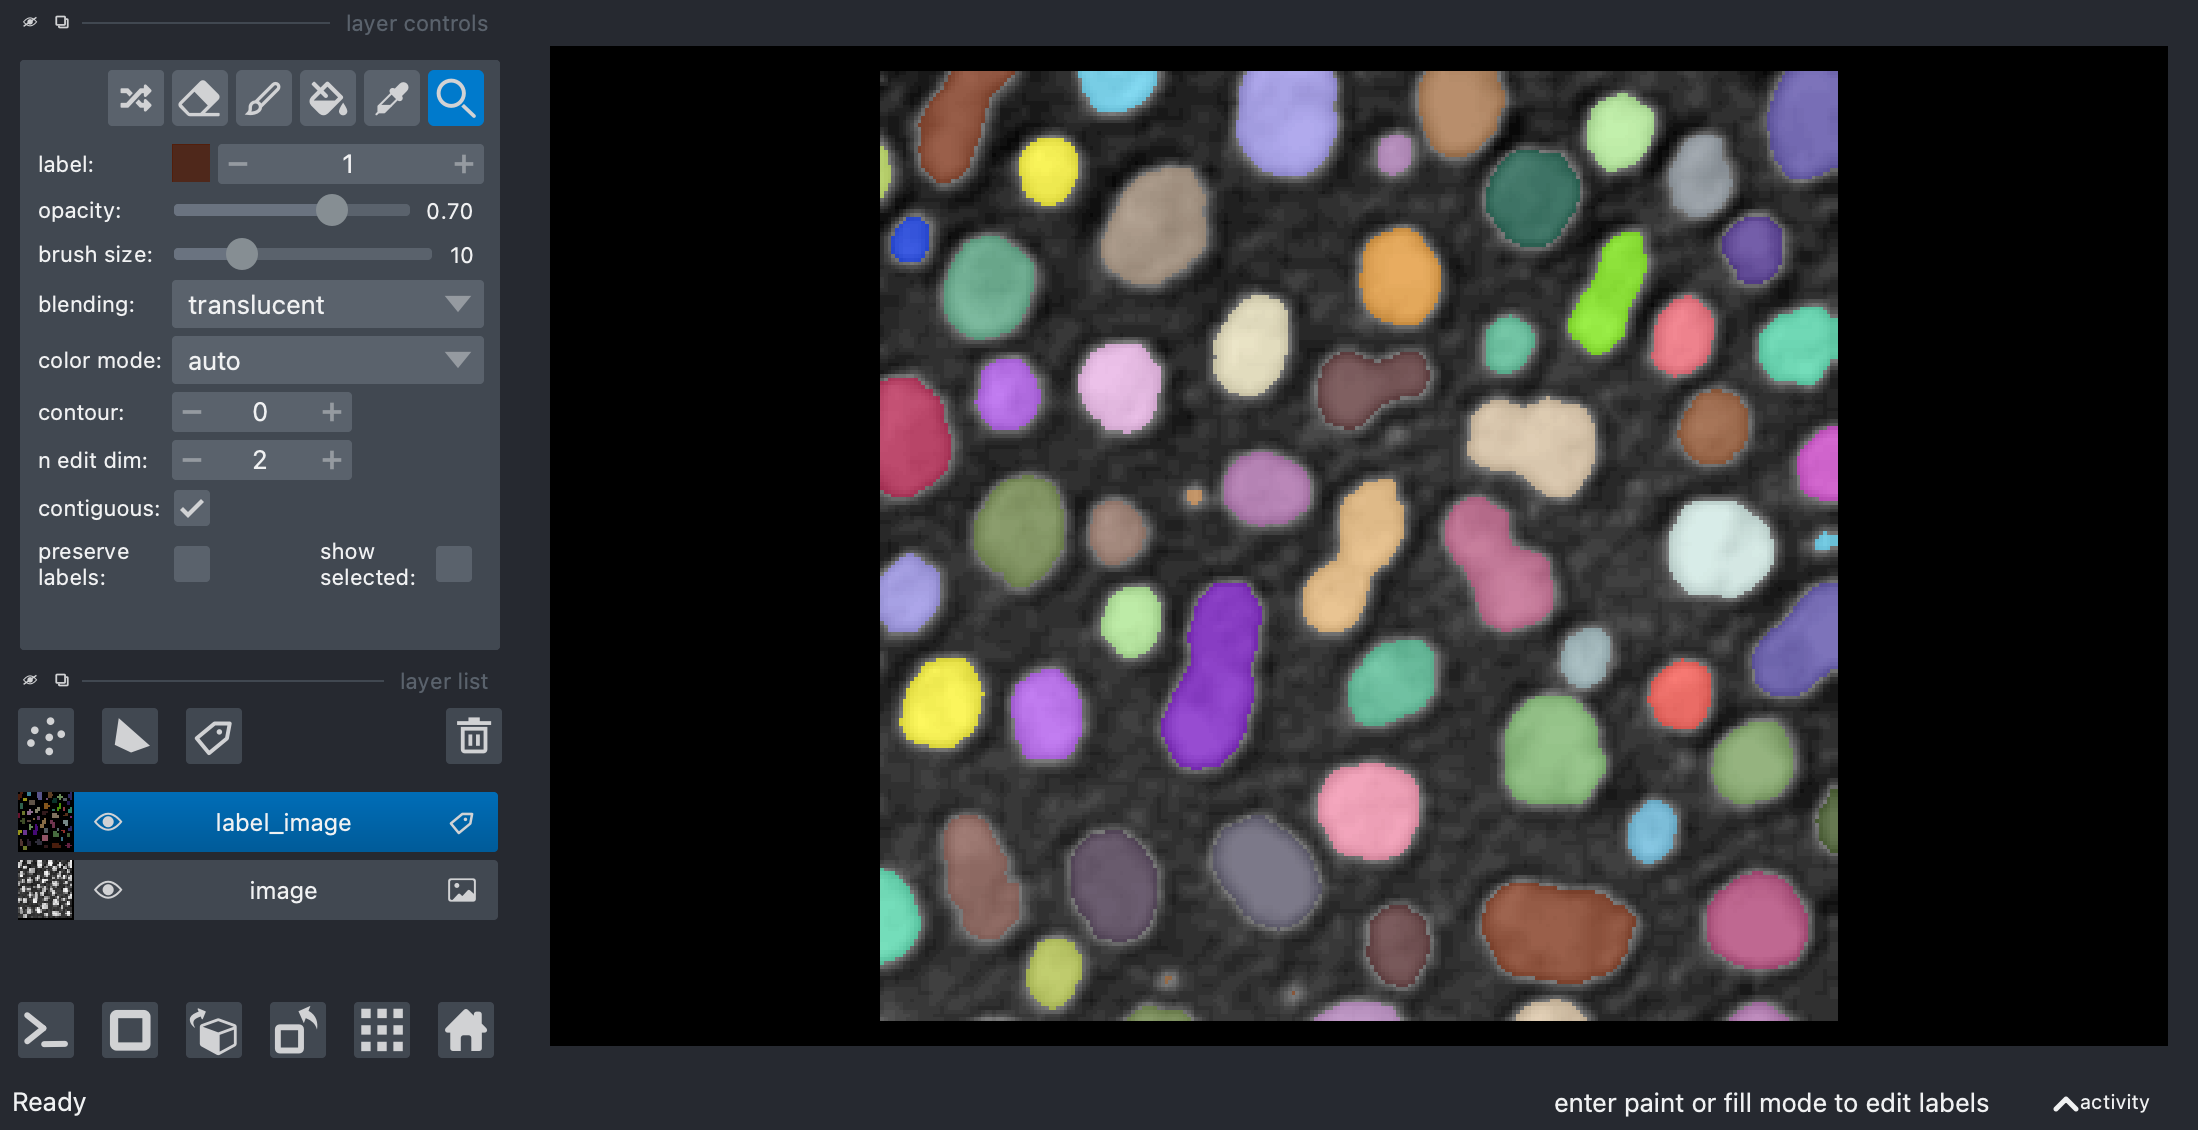

In [5]:
# Blobs segmentieren und labeln
threshold = threshold_otsu(image)
binary_image = image > threshold
label_image = label(binary_image)

# Labels zum Viewer hinzufügen
label_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

## Quantitative Messungen
Wir extrahieren jetzt quantitative Messungen aus dem Labelbild, z.B. indem wir die `area` der gelabelten Objekte messen. Dafür verwenden wir die [`regionprops_table` Funktion](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table) von scikit-image. Wir speichern diese statistischen Messungen in den `properties` der Label-Ebene, damit napari und napari-Plugins die Daten nachbearbeiten können.

In [6]:
# Regioneneigenschaften messen
statistics = regionprops_table(label_image, properties=['area'])

# Eigenschaften in der Labels-Ebene für spätere Wiederverwendung speichern
label_layer.properties = statistics

Wir verwenden dann das skriptfähige napari-Plugin [napari-skimage-regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops), um die Messungen in einem `parametric_image` zu visualisieren und dieses Bild ebenfalls zum napari-Viewer hinzuzufügen.

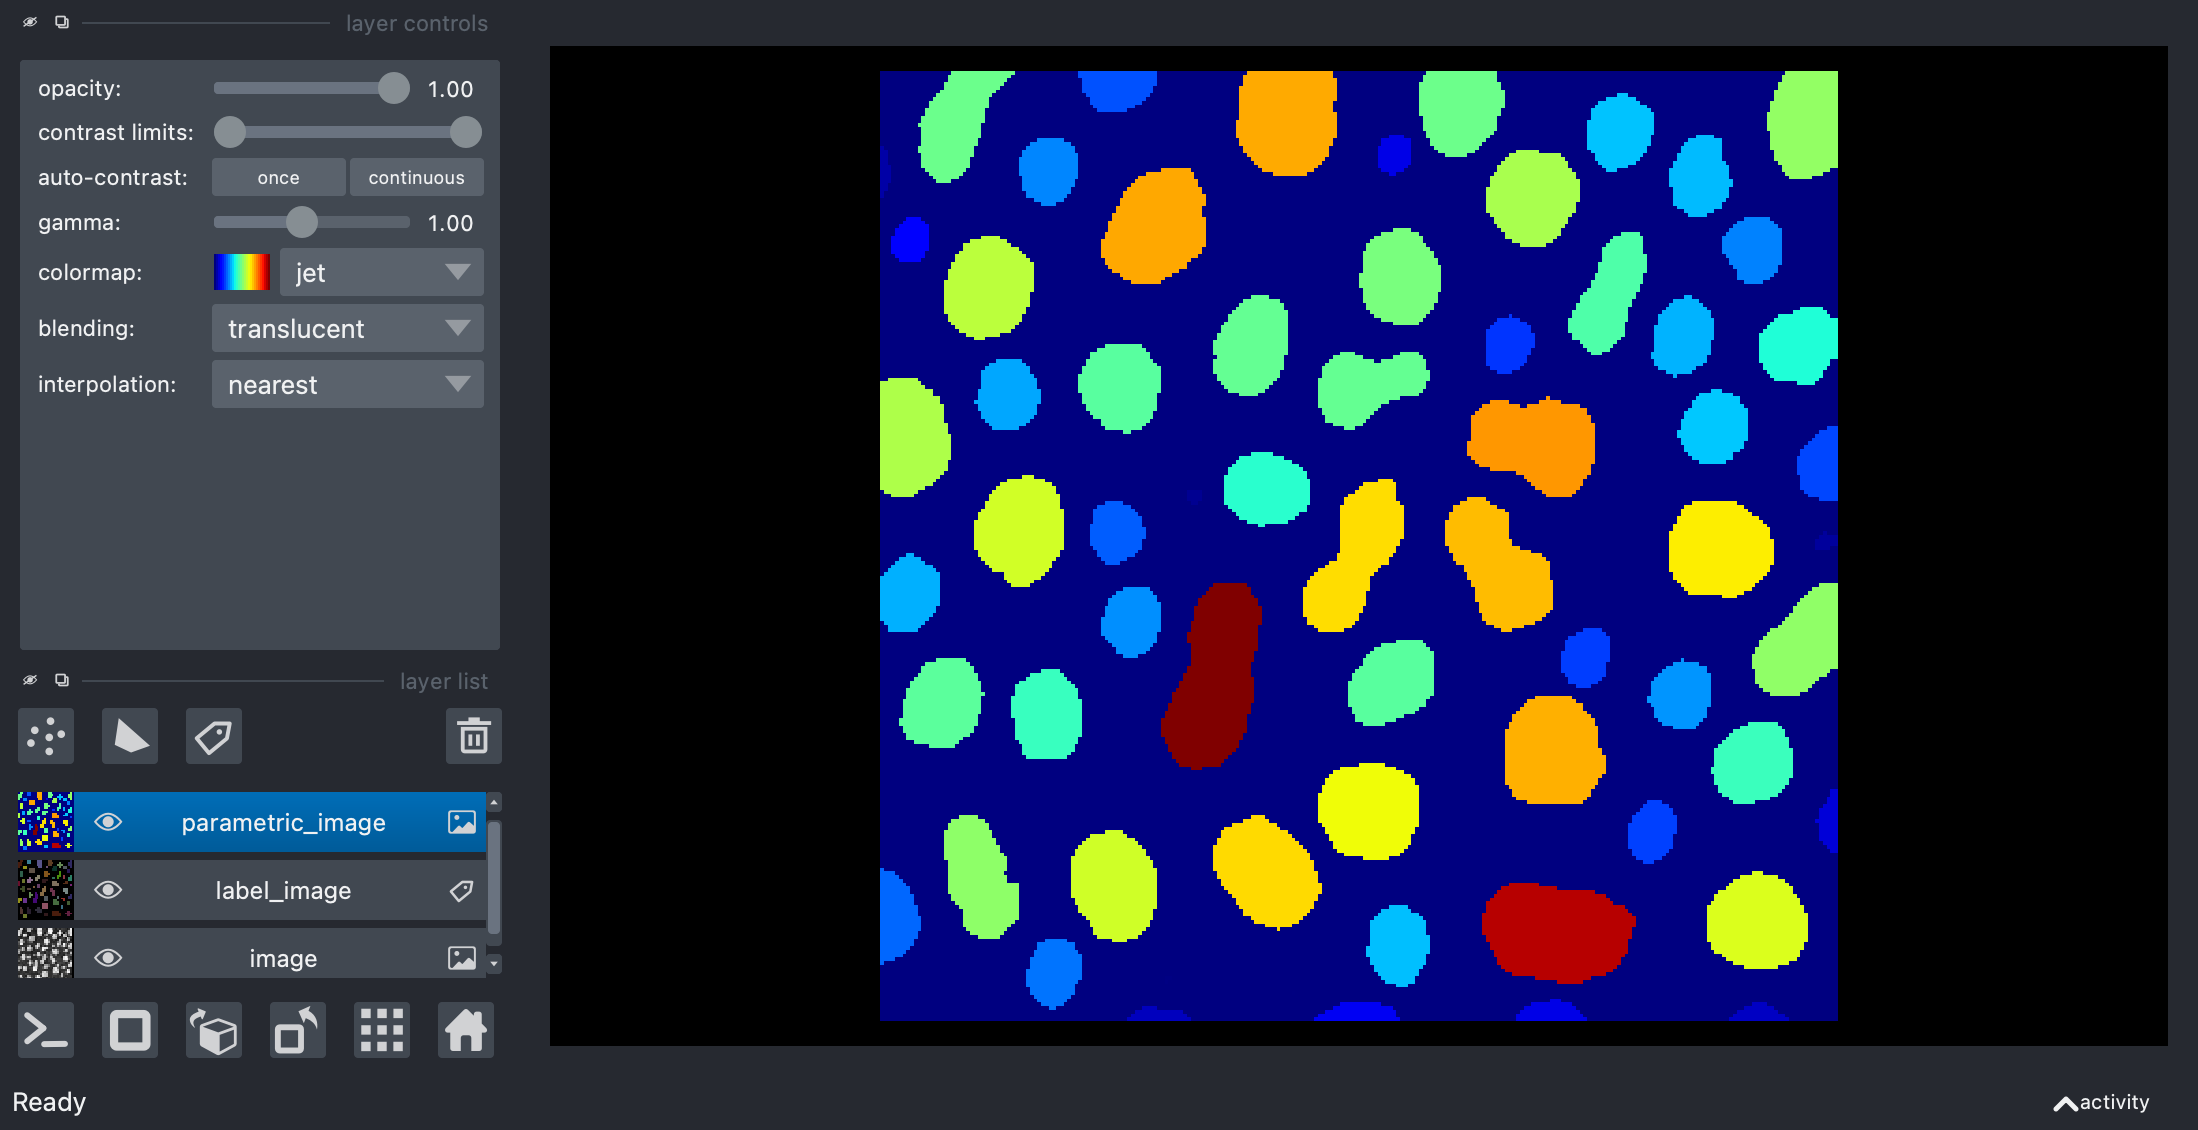

In [7]:
parametric_image = visualize_measurement_on_labels(label_layer, 'area')

viewer.add_image(parametric_image, colormap='jet')

napari.utils.nbscreenshot(viewer)

Wir können die Messungen auch als Tabelle mit der `add_table` Funktion desselben napari-Plugins visualisieren.

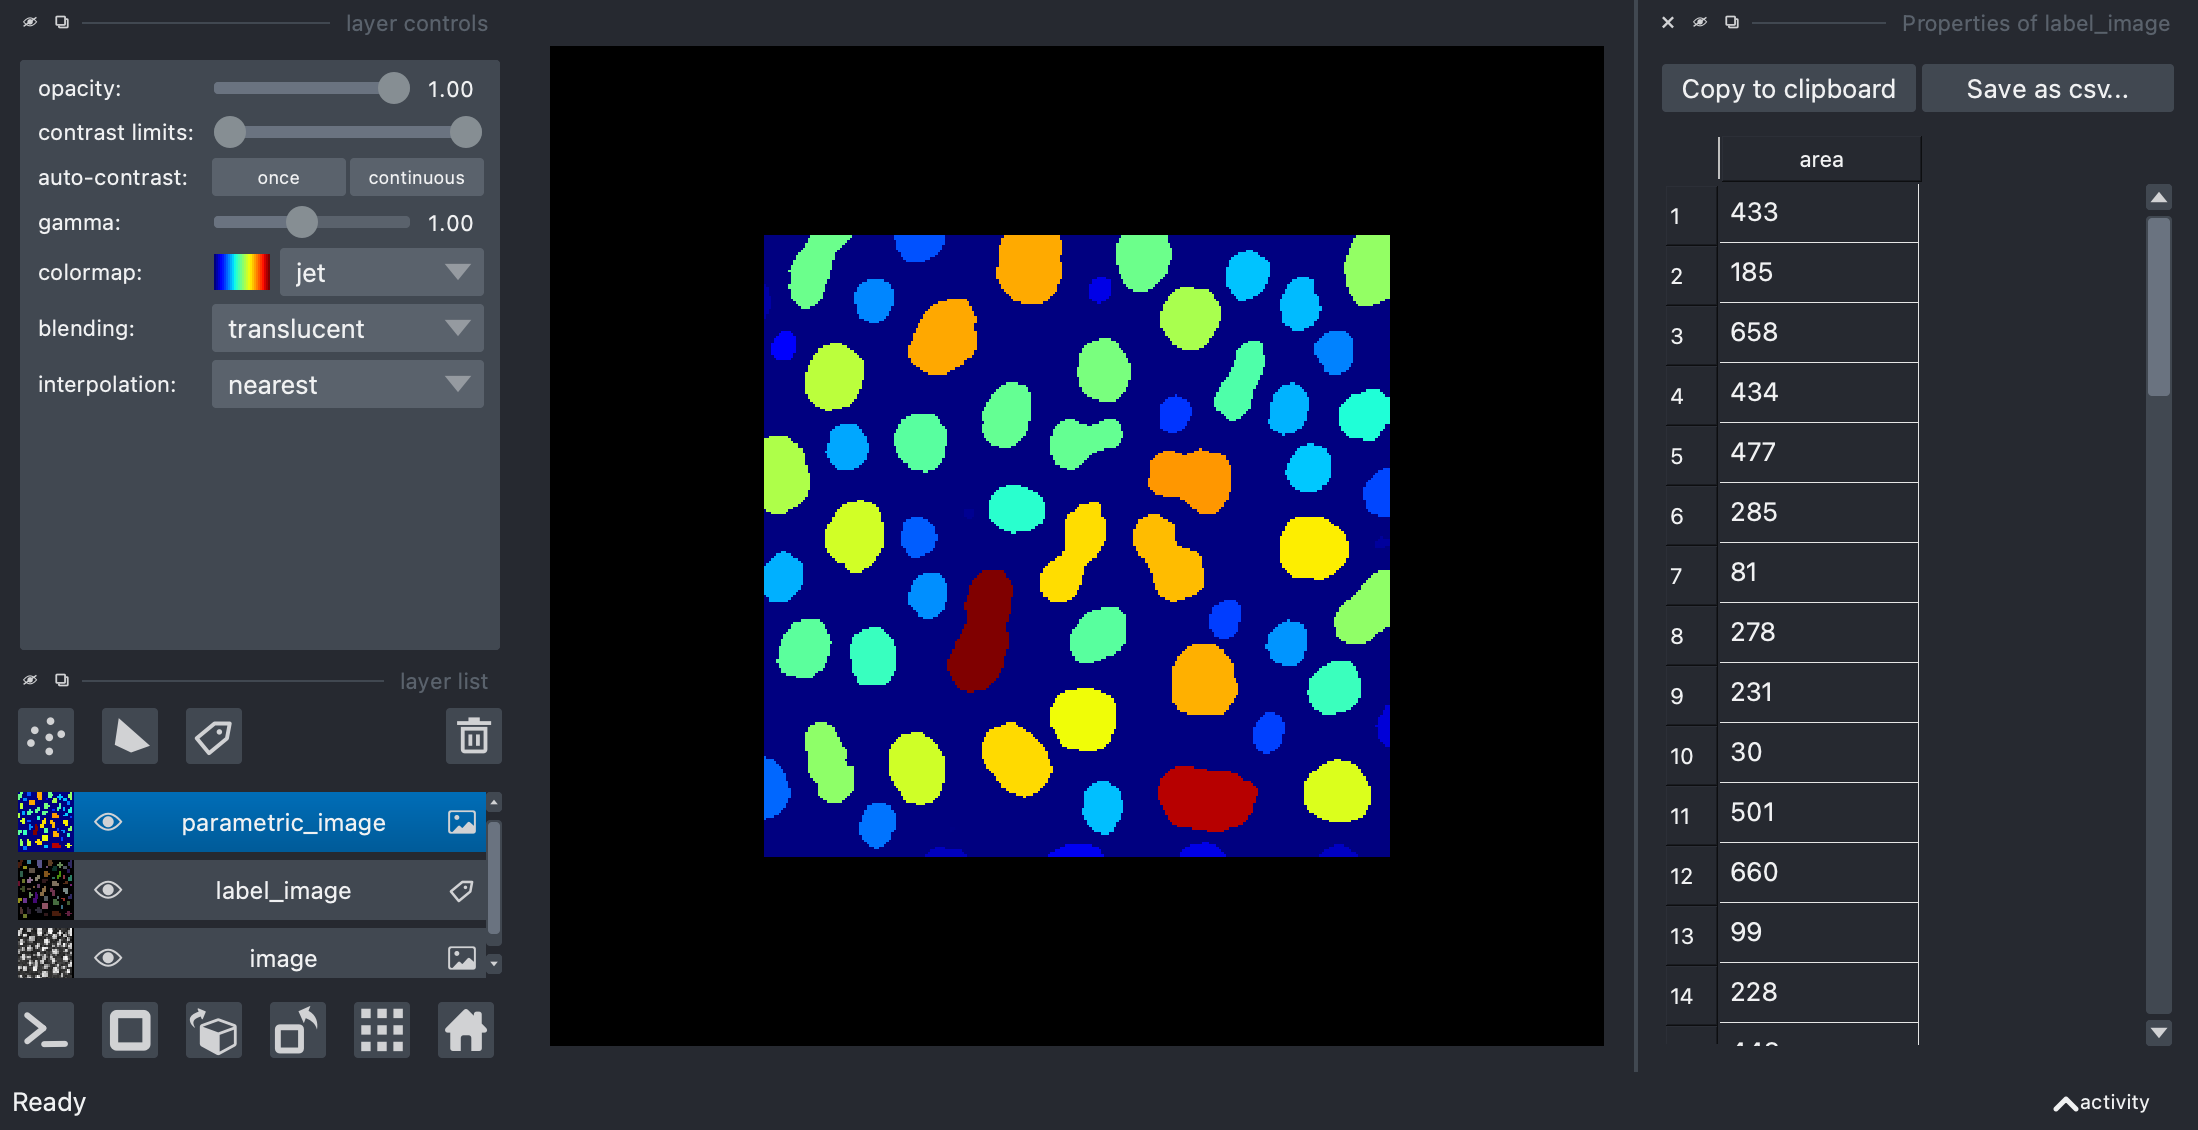

In [8]:
add_table(label_layer, viewer)

napari.utils.nbscreenshot(viewer)

## Übung

Messen Sie das Seitenverhältnis der Objekte und visualisieren Sie die Werte in Farbe.